# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'2.1.1'

# Load the data & view first few rows
The data source: https://github.com/gedeck/practical-statistics-for-data-scientists/tree/master/data. The dataset is extracted from 2010 US census.

In [4]:
state = pd.read_csv('state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


This a dataset of United States `Population` and `Murder.Rate`. The details on how to calculate murder rate can be found [here](https://calculator.academy/homicide-rate-calculator/#:~:text=To%20calculate%20the%20Homicide%20Rate,the%20total%20population%20by%20100000.).

# Print the information about the dataframe

In [5]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


The information contains *number of rows*, *number of columns*, *column labels*, *data types*, and *memory usage*.

# Print the statistical measures of numerical features
This would helps to answer the following questions:
1. What is the average population and murder rate in USA?

In [6]:
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


From the large difference between mean and median of `Population`, it is clear that the `Population` is positively skewed. This might suggest that median is a better estimate compared to mean due to the presence of extremely large values of `Population`.

In [7]:
from scipy.stats import trim_mean

print("mean: ", state["Population"].mean())
print("median: ", state["Population"].median())
print("10% trimmed mean: ", trim_mean(state["Population"], 0.1))

mean:  6162876.3
median:  4436369.5
10% trimmed mean:  4783697.125


## Confidence intervals

Sometimes we might not know what is the true underlying distribution of a certain feature. In this case, non-parametric method is a better option than parametric method.

In [8]:
# confidence interval of population
from scipy.stats import bootstrap
import numpy as np

rng = np.random.default_rng(18)
res_pop = bootstrap((state["Population"].to_numpy(),), np.median, random_state=rng)
res_mr = bootstrap((state["Murder.Rate"].to_numpy(),), np.mean, random_state=rng)

print("The confidence interval of population median: ", res_pop.confidence_interval)
print("The confidence interval of murder rate mean: ", res_mr.confidence_interval)

The confidence interval of population median:  ConfidenceInterval(low=2865591.0, high=5773552.0)
The confidence interval of murder rate mean:  ConfidenceInterval(low=3.582, high=4.619999999999999)


# Data visualization (Numerical data)

## Distribution of a single feature: histogram & density plot

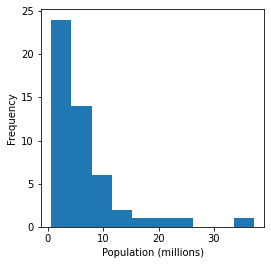

In [9]:
ax = (state["Population"] / 1_000_000).plot.hist(figsize = (4, 4))
ax.set_xlabel("Population (millions)")
plt.show()

In [13]:
binnedPopulation = pd.cut(state["Population"], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

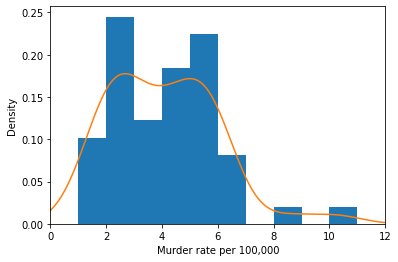

In [10]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim = [0, 12], bins = range(1, 12))
state["Murder.Rate"].plot.density(ax = ax)
ax.set_xlabel('Murder rate per 100,000')
plt.show()

## Distribution of feature: boxplot

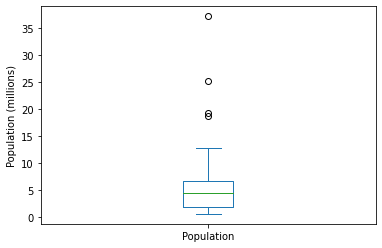

In [11]:
ax = (state["Population"]/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')
plt.show()

So, what are the states that is considered as "outliers" from the box plot above?

In [12]:
state.sort_values(by=["Population"], ascending=False)

,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
42,Texas,25145561,4.4,TX
31,New York,19378102,3.1,NY
8,Florida,18801310,5.8,FL
12,Illinois,12830632,5.3,IL
37,Pennsylvania,12702379,4.8,PA
34,Ohio,11536504,4.0,OH
21,Michigan,9883640,5.4,MI
9,Georgia,9687653,5.7,GA
32,North Carolina,9535483,5.1,NC


## Correlation between 2 variables

In [15]:
state[["Population", "Murder.Rate"]].corr()

,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


### Scatter plot

Text(0, 0.5, 'Murder rate per 100,000')

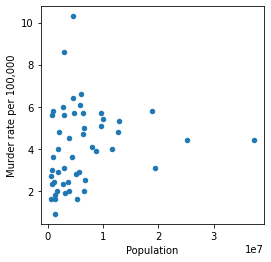

In [18]:
ax = state[["Population", "Murder.Rate"]].plot.scatter(x="Population", y="Murder.Rate", 
                                                       figsize=(4, 4), marker="o")
ax.set_xlabel("Population")
ax.set_ylabel("Murder rate per 100,000")

There is no discernible pattern on the scatter plot and the correlation also shows that population and murder rate are weakly correlated.

# Data visualization (categorical data)
## Data loading

In [28]:
column_labels = ["mpg", "cylinders", "displacement", "horsepower", "weight",
                "acceleration", "model year", "origin", "car name"]

mpg_data = pd.read_csv("dataset/uci_data/auto-mpg.data", sep="\s+", header=None, names=column_labels)
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Visualizing proportion

In [31]:
mpg_data["cylinders"].value_counts() 

cylinders
4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: count, dtype: float64

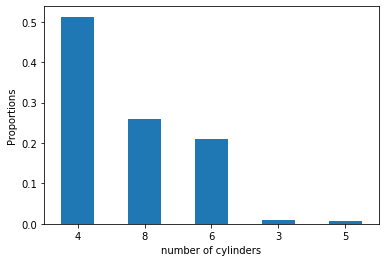

In [37]:
ax = mpg_data["cylinders"].value_counts(normalize=True).plot.bar() 
ax.set_xlabel("number of cylinders")
# ax.set_xticklabels(ax.get_xticks(), rotation=0)
plt.xticks(rotation=0)
ax.set_ylabel("Proportions")
plt.show()

## Piechart

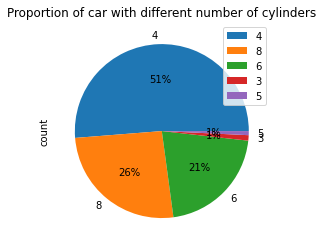

In [52]:
ax = mpg_data["cylinders"].value_counts().plot.pie(
    title="Proportion of car with different number of cylinders",
    autopct=lambda x: f'{x:.0f}%'
)
ax.legend()
plt.show()

In [51]:
mpg_data["cylinders"].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

# Bike sharing dataset

In [20]:
from pathlib import Path

In [21]:
data_path = Path("dataset/uci_data/day.csv")

bike_share_df = pd.read_csv(data_path)
bike_share_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Data visualization of mixed data
- Investigate the relationship between `season` and `temp`. The tool: grouped boxplot.
- Investigate the relationship between `season` and `weathersit`. The tool: grouped barplot.

## grouped boxplot

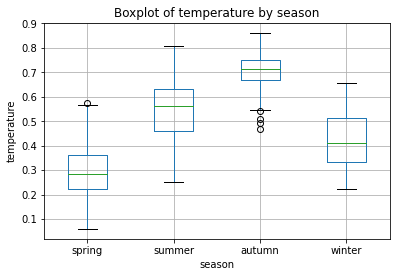

In [58]:
# Grouped boxplots
nx = len(bike_share_df["season"].unique())
ax = bike_share_df.boxplot(by="season", column="temp")
ax.set_xlabel("season")
ax.set_ylabel("temperature")
plt.xticks(np.arange(nx) + 1, ["spring", "summer", "autumn", "winter"])
plt.suptitle("")
plt.title("Boxplot of temperature by season")
plt.show()

## grouped barplot

In [70]:
# Contigency table or pivot table
tab = bike_share_df[["season", "weathersit"]].pivot_table(index="season", columns="weathersit", 
                                                          aggfunc=lambda x: len(x), margins=True)
tab

weathersit,1,2,3,All
season,,,,
1,111,66,4,181
2,113,68,3,184
3,136,48,4,188
4,103,65,10,178
All,463,247,21,731


In [71]:
tab_no_all = bike_share_df[["season", "weathersit"]].pivot_table(index="season", columns="weathersit",
                                                                aggfunc=lambda x: len(x)) 
                                                        
tab_no_all

weathersit,1,2,3
season,,,
1,111,66,4
2,113,68,3
3,136,48,4
4,103,65,10


In [72]:
tab_viz = tab_no_all.reset_index()

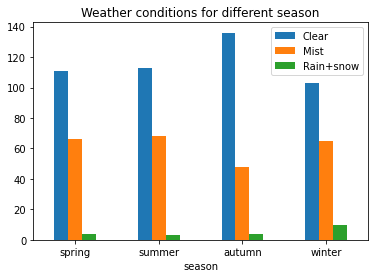

In [76]:
ax = tab_viz.plot(x="season",
             kind="bar",
             stacked=False,
            title="Weather conditions for different season")
plt.xticks(np.arange(nx), ["spring", "summer", "autumn", "winter"], rotation=0)
ax.legend(labels=["Clear", "Mist", "Rain+snow"])
plt.show()

# Summary
- Statistical measures of attributes (recap).
- Data visualization tools
    - histogram + density plot
    - boxplot
    - scatter plot
    - barplot
    - pie chart
    - grouped boxplot
    - grouped barplot

# Hands-on practice
1. Propose and implement one visualization tool to depict the relationship between `mpg` and `weight` attributes. Comment on the results.
2. Perform exercise 1 between variables `mpg` and `model year`.